# Customer Churn Analysis.

##### This Project is predicting the churn that is: the customer will stay or leave!

Import the required Libraries.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn.model_selection 
from sklearn import preprocessing, metrics, svm, tree, ensemble

#### Read and preprocess the data

In [20]:
df = pd.read_csv("DATASET.csv")
df = df.dropna(axis=0, how='any')
print(df.info())
print(df.select_dtypes(include = ["object"]).columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

As 'phone number' will not affect CHURN.
So we can DROP the phone number column.

In [23]:
df = df.drop(['phone number'],axis=1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


We can convert the Categorical Object Data into Numerical.

In [36]:
#We can use Label Encoder to convert Categorical Object data to Numerical
L_E = preprocessing.LabelEncoder()
df["state"] = L_E.fit_transform(df["state"])
df["international plan"] = L_E.fit_transform(df["international plan"])
df["voice mail plan"] = L_E.fit_transform(df["voice mail plan"])
df["churn"] = L_E.fit_transform(df["churn"])
df.head(20)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,1,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,19,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,24,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,49,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [33]:
# Check for Categorical Data
print(df.select_dtypes(include = ["object"]).columns)

Index([], dtype='object')


#### Split the INDEPENDENT VARIABLES and the DEPENDENT VARIABLE |or| the features and the target. 

In [43]:
X = df.drop(['churn'], axis =1).values
Y = df.churn.values 

Applying K_fold Cross_validation as the data is not balanced 

In [44]:
KF = sklearn.model_selection.StratifiedKFold( n_splits=10, shuffle=True)
KF.get_n_splits(Y,X)
#print(KF)
# Build A function to validate the best classifier
def folds(X, Y,Classifier, Kf):
	y_pred = Y.copy()
	for ii,jj in KF.split(X, Y):
		X_train, X_test = X[ii], X[jj]
		y_train = Y[ii]
		clf = Classifier()
		clf.fit(X_train,y_train)
		y_pred[jj] = clf.predict(X_test)
	return y_pred

##### Printing The Accuracy results of Different Classifier

In [45]:
print(metrics.accuracy_score(Y, folds(X, Y, ensemble.GradientBoostingClassifier, KF)))
print(metrics.accuracy_score(Y, folds(X, Y, ensemble.RandomForestClassifier, KF)))
print(metrics.accuracy_score(Y, folds(X, Y, svm.SVC, KF)))


0.9513951395139514


c:\users\sukhman singh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\sukhman singh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\sukhman singh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\sukhman singh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in 

0.9444944494449445


c:\users\sukhman singh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\sukhman singh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\sukhman singh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

0.8550855085508551


c:\users\sukhman singh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\sukhman singh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\sukhman singh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\sukhman singh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in 

[[2811   39]
 [ 131  352]] 
 [[2826   24]
 [ 177  306]] 
 [[2850    0]
 [ 483    0]]
CONFUSION_MATRIX FOR: GradientBoostingClassifier 


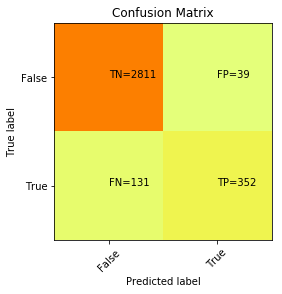

CONFUSION_MATRIX FOR: RandomForestClassifier 


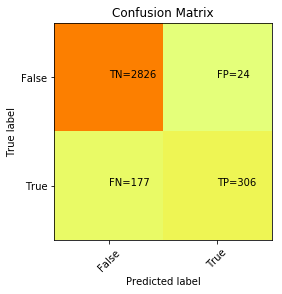

CONFUSION_MATRIX FOR: SupportVectorClassifier 


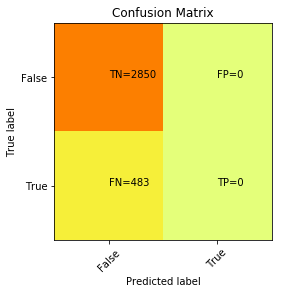

In [46]:
#Using pre built Module for plotting Confusion Matrix
c_m_GBC = metrics.confusion_matrix(Y,folds(X, Y, ensemble.GradientBoostingClassifier, KF))
c_m_RFC = metrics.confusion_matrix(Y,folds(X, Y, ensemble.RandomForestClassifier, KF))
c_m_SVC = metrics.confusion_matrix(Y,folds(X, Y, svm.SVC, KF))
print(c_m_GBC,'\n', c_m_RFC,'\n',  c_m_SVC )
from C_M_Plot import matplot_build
print("CONFUSION_MATRIX FOR: GradientBoostingClassifier ")
matplot_build(c_m_GBC)
print("CONFUSION_MATRIX FOR: RandomForestClassifier ")
matplot_build(c_m_RFC)
print("CONFUSION_MATRIX FOR: SupportVectorClassifier ")
matplot_build(c_m_SVC)